In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [4]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)
    
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

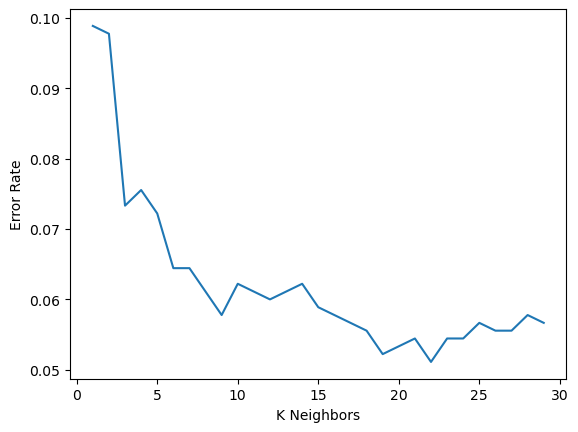

In [5]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score

cv_scores = []

for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

    
max_optimal_k = cv_scores.index(max(cv_scores)) + 1 

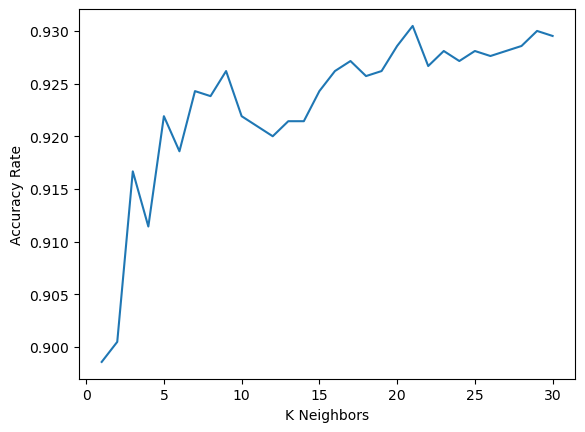

In [7]:
plt.plot(range(1,31), cv_scores)
plt.ylabel('Accuracy Rate')
plt.xlabel('K Neighbors')
plt.show()

In [8]:
optimal_k = 9

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(scaled_X_train, y_train)

knn_optimal_pred = knn_optimal.predict(scaled_X_test)

print(confusion_matrix(y_test, knn_optimal_pred))
print()
print(classification_report(y_test, knn_optimal_pred))

[[446  24]
 [ 28 402]]

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

